# Data Analysis and Visualisations

__Project Goal__

Compare recipes from two popular recipe websites, Spoonacular and Food.com, and identify "healthy" recipes using two market-implemented measures: Nutri-Scores and Weight Watchers (WW) Smart Points. The project will investigate recipe popularity, meal types, and cuisines.

__Scope__
* Nutritional values of interest: `calories`, `saturated fat`, `sugar`, and `protein`.
* Meal types: `breakfast`, `lunch`, and `dinner`.
* Cuisines

__Research Questions__
1. Are more popular / higher-rated recipes healthier? What is the health rating of the highest-rated recipes?
2. What meal type (i.e., breakfast, lunch, or dinner) have the healthiest / unhealthiest (percentage) recipes? What is the most popular ingredient for each meal?
3. Which cuisine has the healthiest recipes?

# Setup
This section contains the library imports and functions used throughout the project.

In [162]:
!pip install dataframe-image

  Obtaining dependency information for dataframe-image from https://files.pythonhosted.org/packages/3a/db/d6a6e1247c90b5f96adaaa7c34c5a3935c9f21c7adcbec8a8b10c2d8db47/dataframe_image-0.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for cssutils from https://files.pythonhosted.org/packages/7a/4a/acc05aba9edb75bf016d9f57928f0bea5a33de2079fd09ca61baec79a6f2/cssutils-2.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for html2image from https://files.pythonhosted.org/packages/89/b9/1dc02a535c71ceed5b71bd0f82e5d31fba100b59d43a35d5c40d836a8525/html2image-2.0.4.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [163]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import hvplot.pandas
import dataframe_image as dfi

# Import functions notebook
%run functions.ipynb

In [2]:
# Import cleaned data
clean_recipes = pd.read_csv('Output/clean_recipes.csv')
clean_recipes.head()

,name,id,minutes,submitted,tags,n_steps,ingredients,n_ingredients,rating,meal_type,...,Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
0,munch without guilt tomatoes,30300,10,2002-06-04,"['15-minutes-or-less', 'time-to-make', 'course...",3,"['tomatoes', 'crackers', 'mayonnaise', 'black ...",4,5.000000,dinner,...,0.0,0.0,0.0,0.00,0.5,0.000,0.0,0.0,0.0,1
1,now and later vegetarian empanadas,38276,90,2002-08-26,"['weeknight', 'time-to-make', 'course', 'main-...",41,"['carrots', 'butter', 'onion', 'sliced mushroo...",22,4.200000,lunch,...,26.0,61.0,18.0,23.40,12.0,0.504,13.0,12.2,54.0,20
2,pour over anything mushroom gravy,35595,20,2002-07-29,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['onion', 'mushroom pieces', 'sodium-free vege...",8,3.000000,dinner,...,2.0,0.0,2.0,0.00,5.5,0.000,1.0,0.0,6.0,7
3,tide me over indian chaat simple veggie salad,63793,2,2003-06-05,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['cucumber', 'potato', 'chopped tomato', 'plai...",7,4.428571,lunch,...,5.0,3.0,4.0,0.65,7.5,0.000,2.5,0.6,12.0,9
4,denauseating with ginger tea,30473,10,2002-06-05,"['15-minutes-or-less', 'time-to-make', 'course...",5,"['water', 'ginger', 'tea bag', 'honey', 'milk']",5,4.727273,breakfast,...,0.0,0.0,1.0,0.00,5.5,0.000,0.0,0.0,3.0,7


## Distribution

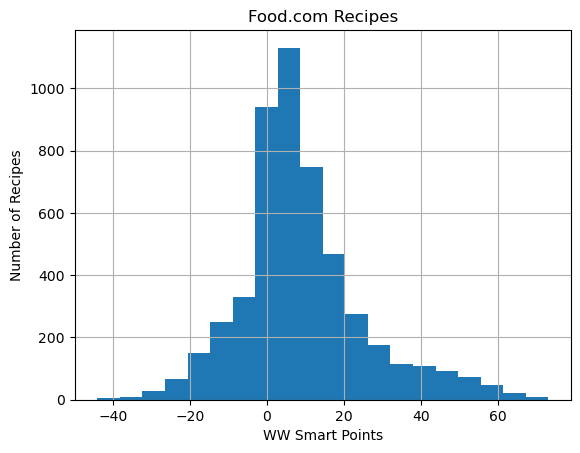

In [3]:
# Create a histogram of the points to understand distribution
clean_recipes['wws_points'].hist(bins=20)
plt.title("Food.com Recipes")
plt.xlabel("WW Smart Points")
plt.ylabel("Number of Recipes")
plt.show()

ShapiroResult(statistic=0.9628822803497314, pvalue=6.444318412235361e-10)

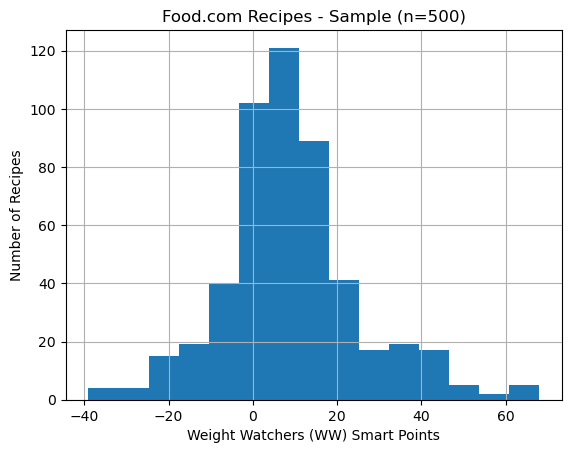

In [4]:
# Check for Gaussian distribution - using Shapiro-Wilk test
# Note: Shapiro-Wilk is sensitive to sample size
sample_size = 500
sample_set = clean_recipes['wws_points'].sample(n=sample_size)
sample_set.hist(bins=15)
plt.title(f"Food.com Recipes - Sample (n={sample_size})")
plt.xlabel("Weight Watchers (WW) Smart Points")
plt.ylabel("Number of Recipes")

stats.shapiro(sample_set)
# A very high W-statistic suggests a good fit to a normal distribution.
# A near-zero p-value, for a Shapiro-Wilk test, rejects the null hypothesis, meaning NOT a normal distribution.

In [5]:
# WW Smart Points descriptive statistics
points_stats = clean_recipes['wws_points'].describe()
points_stats

count    5046.000000
mean        8.986128
std        16.408747
min       -44.000000
25%         0.000000
50%         6.000000
75%        16.000000
max        73.000000
Name: wws_points, dtype: float64

# Popularity

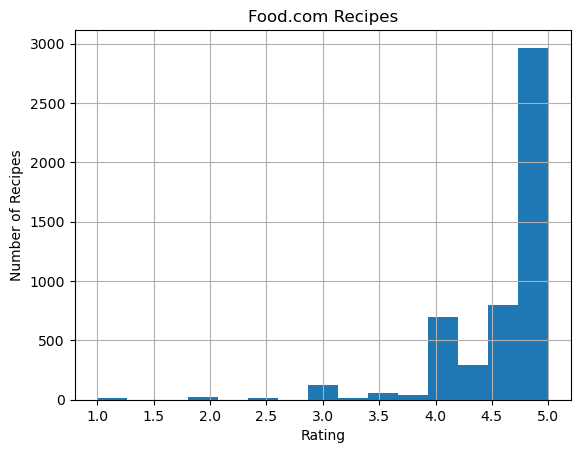

In [6]:
# Distribution of ratings in the dataset
clean_recipes['rating'].hist(bins=15)
plt.title("Food.com Recipes")
plt.xlabel("Rating")
plt.ylabel("Number of Recipes")
plt.show()

In [7]:
# Separate the dataset to "healthy" (above median) and "unhealthy" (below median)
healthy_recipes = clean_recipes.loc[clean_recipes['wws_points'] >= points_stats['50%']]
unhealthy_recipes = clean_recipes.loc[clean_recipes['wws_points'] < points_stats['50%']]

# Calculate the mean and median
healthy_median = healthy_recipes['rating'].median()
healthy_mean = healthy_recipes['rating'].mean()
unhealthy_median = unhealthy_recipes['rating'].median()
unhealthy_mean = unhealthy_recipes['rating'].mean()

# Print the results
print(f"Healthy recipes\nMedian: {round(healthy_median, 2)}\nMean: {round(healthy_mean, 2)}\n")
print(f"Unhealthy recipes\nMedian: {round(unhealthy_median, 2)}\nMean: {round(unhealthy_mean, 2)}")

Healthy recipes
Median: 4.89
Mean: 4.62

Unhealthy recipes
Median: 4.86
Mean: 4.62


Total number of "5-star" recipes: 2381


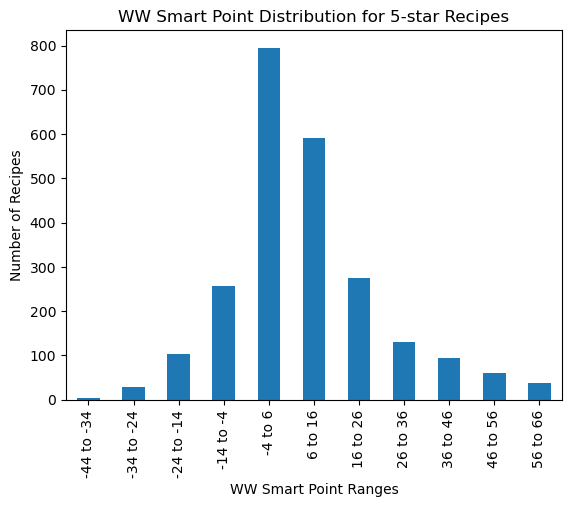

In [86]:
# What is the heath rating of '5-star' recipes?
highest_rated = clean_recipes.loc[clean_recipes['rating'] >= 5]
print(f'Total number of "5-star" recipes: {highest_rated.shape[0]}')

# Create bins
min_points = highest_rated['wws_points'].min()
max_points = highest_rated['wws_points'].max()
points_range = max_points - min_points
points_bins = np.arange(min_points, max_points, 10) # 5 was good with less granular cuisines
points_labels = [f'{points_bins[i]} to {points_bins[i+1]}' for i in range(len(points_bins)-1)]
bins_df = pd.cut(highest_rated['wws_points'], bins=points_bins, labels=points_labels)

# Set the index and its name
points_df = highest_rated.set_index(bins_df)
points_df.index.name = "WWS Point Ranges"

# Create grouped DataFrame by count
binned_df = points_df.groupby(['WWS Point Ranges']).count()
binned_df['id'].plot(kind="bar")

# Plot formatting
plt.title("WW Smart Point Distribution for 5-star Recipes")
plt.xlabel("WW Smart Point Ranges")
plt.ylabel("Number of Recipes")
plt.show()

In [88]:
# Identify the healthiest 5-star recipes

healthiest_recipes = highest_rated[['name', 'wws_points', 'cuisine', 'protein_g', 'meal_type']]
healthiest_recipes = healthiest_recipes.sort_values('wws_points').reset_index(drop=True)
healthiest_recipes.head(10)

,name,wws_points,cuisine,protein_g,meal_type
0,garlic chicken kabobs on rosemary skewers,-44,greek,54.0,lunch
1,cajun style grilled swordfish,-39,cajun,56.0,dinner
2,venison gyros,-36,greek,57.5,lunch
3,delicious mexi baked fish fillets,-36,mexican,59.0,dinner
4,lime chicken taco s,-35,mexican,48.5,lunch
5,golden grouper,-35,caribbean,50.5,dinner
6,haddock in mustard sauce,-32,german,48.5,dinner
7,puck s packet o fish,-32,french,43.5,dinner
8,charred prawns shrimp with capsicum mayonnaise,-32,mexican,51.5,dinner
9,moroccan marinade for grilling chicken,-31,african,50.0,dinner


In [11]:
best_recipe = clean_recipes.loc[clean_recipes['id'] == 175916]
best_recipe

,name,id,minutes,submitted,tags,n_steps,ingredients,n_ingredients,rating,meal_type,...,Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
1751,garlic chicken kabobs on rosemary skewers,175916,40,2006-07-03,"['lactose', '60-minutes-or-less', 'time-to-mak...",11,"['rosemary sprigs', 'boneless skinless chicken...",6,5.0,lunch,...,108.0,3.0,3.0,2.6,0.0,0.144,54.0,0.6,9.0,-44


In [12]:
# What is the health rating of the highest-rated recipes?
by_rating = highest_rated.groupby(['wws_points']).mean(numeric_only=True)
by_rating

,id,minutes,n_steps,n_ingredients,rating,Calories,Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g
wws_points,,,,,,,,,,,,,,,,,,
-44,175916.000000,40.000000,11.000000,6.000000,5.0,283.500000,4.000000,0.000000,6.000000,108.000000,3.000000,3.0,2.600000,0.000000,0.144,54.000000,0.600000,9.0
-39,55750.000000,20.000000,5.000000,8.000000,5.0,477.100000,39.000000,0.000000,9.000000,112.000000,28.000000,0.0,25.350000,0.000000,0.216,56.000000,5.600000,0.0
-36,400050.500000,80.000000,9.000000,10.500000,5.0,432.400000,17.500000,11.000000,27.500000,116.500000,23.500000,6.5,11.375000,5.500000,0.660,58.250000,4.700000,19.5
-35,424915.500000,27.500000,9.000000,12.500000,5.0,313.800000,15.000000,5.000000,16.500000,99.000000,22.500000,0.5,9.750000,2.500000,0.396,49.500000,4.500000,1.5
-32,312849.000000,33.333333,13.333333,10.000000,5.0,338.266667,18.333333,5.666667,17.333333,95.666667,23.000000,2.0,11.916667,2.833333,0.416,47.833333,4.600000,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,375937.500000,28.750000,7.500000,8.750000,5.0,367.625000,32.250000,94.500000,9.250000,16.500000,61.000000,12.0,20.962500,47.250000,0.222,8.250000,12.200000,36.0
64,79622.333333,31.666667,13.666667,9.666667,5.0,460.766667,21.000000,90.333333,11.000000,10.666667,16.666667,15.0,13.650000,45.166667,0.264,5.333333,3.333333,45.0
65,155403.000000,20.000000,7.000000,11.000000,5.0,321.400000,33.000000,98.000000,12.000000,10.000000,23.000000,10.0,21.450000,49.000000,0.288,5.000000,4.600000,30.0


<Axes: xlabel='WWS Point Ranges'>

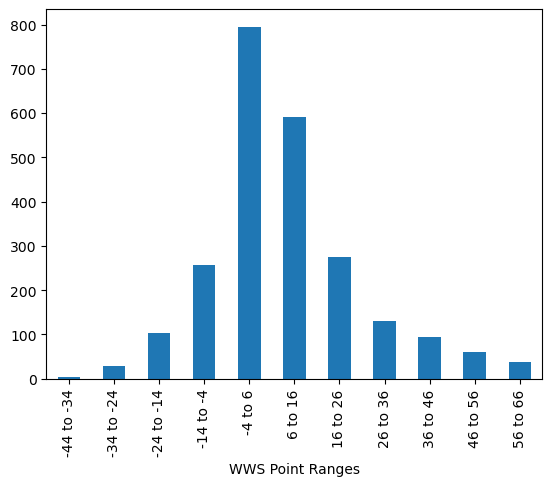

In [31]:
# Create bins
min_points = highest_rated['wws_points'].min()
max_points = highest_rated['wws_points'].max()
points_bins = np.arange(min_points, max_points, 10) # 5 was good with less granular cuisines
points_labels = [f'{points_bins[i]} to {points_bins[i+1]}' for i in range(len(points_bins)-1)]
bins_df = pd.cut(highest_rated['wws_points'], bins=points_bins, labels=points_labels)

# # Set the index and its name
points_df = highest_rated.set_index(bins_df)
points_df.index.name = "WWS Point Ranges"

# # Create grouped DataFrame by numeric means
binned_df = points_df.groupby(['WWS Point Ranges']).count()
binned_df['id'].plot(kind="bar")

In [14]:
bins = [1, 2, 3, 4, 5]
group_name = ['Poor', 'Fair', 'Good', 'Very Good']
clean_recipes['rating_scale'] = pd.cut(clean_recipes['rating'], bins, labels=group_name, include_lowest=True)
df = pd.DataFrame(clean_recipes.groupby('rating_scale')['wws_points'].mean()).reset_index()
df

,rating_scale,wws_points
0,Poor,9.883721
1,Fair,9.228571
2,Good,9.151786
3,Very Good,8.936504


# Meal Types

In [16]:
# Isolate 'breakfast, lunch, dinner' from clean_recipes
meal_df = clean_recipes.groupby(['meal_type']).median(numeric_only=True)
meal_df

,id,minutes,n_steps,n_ingredients,rating,Calories,Total Fat (PDV),Sugar (PDV),Sodium (PDV),Protein (PDV),Saturated Fat (PDV),Carbohydrates (PDV),total_fat_g,sugar_g,sodium_g,protein_g,sat_fat_g,carbs_g,wws_points
meal_type,,,,,,,,,,,,,,,,,,,
breakfast,235956.0,26.0,10.0,8.0,5.000000,287.5,24.0,13.0,15.0,24.0,27.0,7.0,15.6,6.5,0.360,12.0,5.4,21.0,5.0
dinner,184090.5,35.0,9.0,10.0,4.875000,268.8,20.0,15.0,12.0,18.0,18.0,5.0,13.0,7.5,0.288,9.0,3.6,15.0,7.0
lunch,176079.0,30.0,9.0,9.0,4.833333,297.0,20.0,13.0,19.0,26.0,18.0,8.0,13.0,6.5,0.456,13.0,3.6,24.0,5.0


In [17]:
updated_types = clean_recipes['meal_type'].unique()
updated_types = ['breakfast', 'lunch', 'dinner']

# Breakfast
breakfast = clean_recipes.loc[clean_recipes['meal_type'] == "breakfast"].copy()
print(f'breakfast: {breakfast.shape}')

# Lunch
lunch = clean_recipes.loc[clean_recipes['meal_type'] == "lunch"].copy()
print(f'lunch: {lunch.shape}')

# Dinner
dinner = clean_recipes.loc[clean_recipes['meal_type'] == "dinner"].copy()
print(f'dinner: {dinner.shape}')

breakfast: (519, 26)
lunch: (1403, 26)
dinner: (3124, 26)


breakfast R-value: 0.097
lunch R-value: 0.386
dinner R-value: 0.234


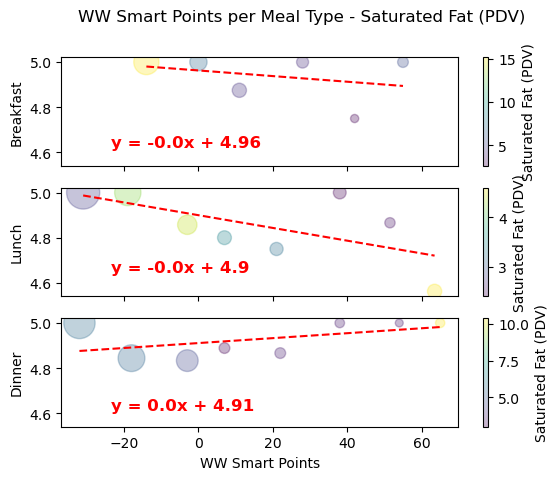

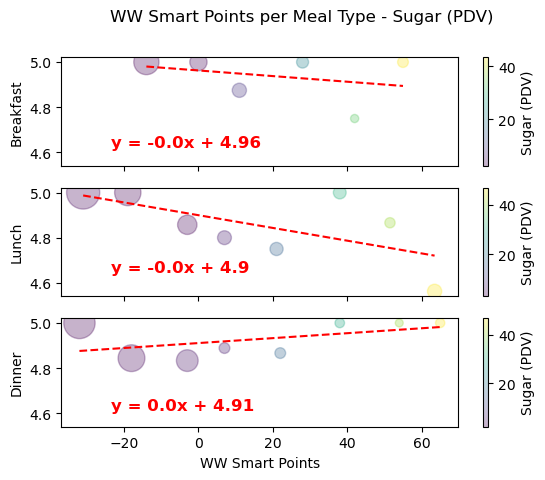

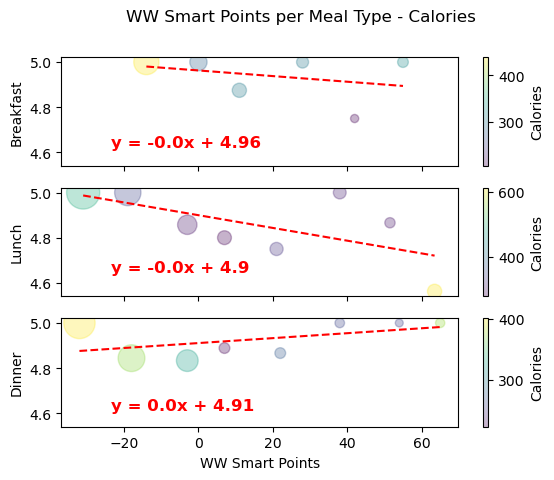

In [18]:
# Create list of nutritional values to create a plot for
nutrition_list = ['Calories', 'Saturated Fat (PDV)', 'Sugar (PDV)']

def meal_plots(target_nutrition):
    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    x_col = 'wws_points'
    y_col = 'rating'
    size_col = 'protein_g'
    df_list = [breakfast, lunch, dinner]

    rsquared_list = []
    for idx, val in enumerate(df_list):        
        colour_col = target_nutrition
        # Bin by `wws_points`
        min_points = df_list[idx]['wws_points'].describe().min()
        max_points = df_list[idx]['wws_points'].describe().max()
        
        # Create bins
        points_bins = np.arange(min_points, max_points, 15) # 5 was good with less granular cuisines
        points_labels = [f'{points_bins[i]} to {points_bins[i+1]}' for i in range(len(points_bins)-1)]
        bins_df = pd.cut(df_list[idx]['wws_points'], bins=points_bins, labels=points_labels)
        
        # Set the index and its name
        points_df = df_list[idx].set_index(bins_df)
        points_df.index.name = "WWS Point Ranges"
        
        # Create grouped DataFrame by numeric means
        binned_df = points_df.groupby(['WWS Point Ranges']).median(numeric_only=True) # originally mean
        binned_df
    
        # Extract x- and y-values
        x = binned_df[x_col]
        y = binned_df[y_col]
        size = binned_df[size_col]
        colour = binned_df[colour_col]
    
        scatter_plot = axs[idx].scatter(x, y, s=size*10, alpha=0.3, c=colour)
        axs[2].set_xlabel('WW Smart Points')
        axs[idx].set_ylabel(updated_types[idx].title())
        cbar = plt.colorbar(scatter_plot)

        if (target_nutrition == "sat_fat_g"):
            bar_label = nutrition_list[1]
        elif (target_nutrition == "sugar_g"):
            bar_label = nutrition_list[2]
        else:        
            bar_label = target_nutrition
        cbar.set_label(bar_label)
        fig.suptitle(f"WW Smart Points per Meal Type - {bar_label}")
    
        (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
        line_equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
        regression_values = slope * x + intercept
        axs[idx].plot(x, regression_values, linestyle='--', c='red')
        if idx == 0:
            x_coord, y_coord = 80, 240
        elif idx == 1:
            x_coord, y_coord = 80, 150
        elif idx == 2:
            x_coord, y_coord = 80, 50
        axs[idx].annotate(line_equation, xy=(x_coord, y_coord), xycoords='figure points',
            fontsize = 12, color='red', weight='bold')

        rsquared = round(rvalue**2, 3)
        rsquared_list.append(rsquared)
        # print(f'{updated_types[idx]} R-value: {rsquared}')
    
    fig.savefig(f'Images/Question 2 - WW Smart Points & {colour_col}.png')
    return(rsquared_list)

rvals = meal_plots('sat_fat_g')
for index in range(len(rvals)):
    print(f'{updated_types[index]} R-value: {rvals[index]}')
meal_plots('sugar_g')
meal_plots('Calories')
plt.show()

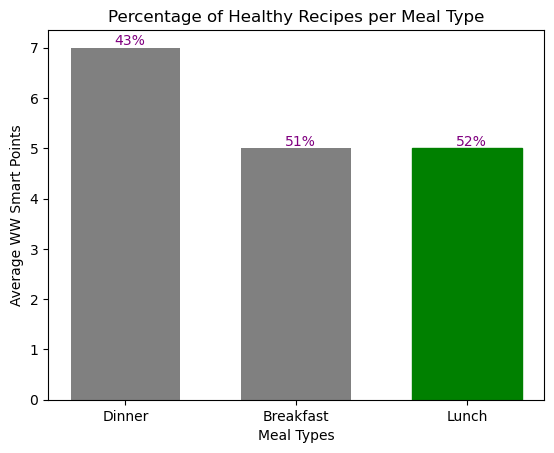

In [19]:
# Create a DataFrame grouped by the means of each cuisine
meal_df = clean_recipes.groupby(['meal_type']).median(numeric_only=True)

# Get percentage of "healthy" recipes per cuisine
# Set the limit as the median 'wws_points'
wws_median = clean_recipes['wws_points'].describe()['50%']

# Get the total number of recipes per cuisine
meal_count = clean_recipes.groupby(['meal_type'])['id'].count()

# Create a DataFrame of recipes that sit above the median 'wws_points'
healthy_count = clean_recipes.loc[clean_recipes['wws_points'] < wws_median]

# Create a groupby DataFrame that counts the number of healthy recipes
healthy_group = healthy_count.groupby(['meal_type'])['id'].count()

# Calculate the percentage value
percent_healthy = []
for idx in range(len(meal_count)):
    percent_healthy.append(int(healthy_group[idx] * 100 / meal_count[idx]))

# Create a DataFrame with calculated percentages, add the average WWS Points as a new column
percent_df = pd.DataFrame(percent_healthy, index=healthy_group.index, columns=['percent_healthy'])
percent_df['ave_wws_points'] = meal_df['wws_points']

# Sort the values and reset index to recover 'cuisine'
percent_df = percent_df.sort_values(by=['percent_healthy'], ascending=True).reset_index()

# Plot the bar chart
bar_chart = plt.bar(
    x = percent_df['meal_type'],
    height = percent_df['ave_wws_points'],
    width = 0.64,
    color = "grey")
bar_chart.set_figwidth = 10
bar_chart.set_figheight = 10

# Set the labels
plt.title("Percentage of Healthy Recipes per Meal Type")
plt.xlabel("Meal Types")
plt.ylabel("Average WW Smart Points")

# Set the xticks
meal_titles = [word.title() for word in percent_df['meal_type']]
plt.xticks(
    ticks = percent_df['meal_type'],
    labels = meal_titles)

# Find the healthiest meal index and set the bar colour to green
highest_pct = percent_df['percent_healthy'].max()
healthiest_meal = percent_df.loc[percent_df['percent_healthy'] == highest_pct].index[0]
bar_chart[healthiest_meal].set_color('green')


# Annotate the bar chart with the percentage values
for index, row in percent_df.iterrows():
    plt.annotate(
        f"{row['percent_healthy']}%",
        color = "purple",
        xy = (row.name, meal_df[meal_df.index == row['meal_type']]['wws_points']),
        xytext = (-8, 2),
        textcoords='offset points')

# Save the plot as a png
plt.savefig(f'Images/Question 2 - Percentage of Healthy Recipes per Meal Type.png')

### What is the most popular ingredient for each meal?

In [168]:
# Get a list of unique tags
unique_ingredients = []
for string in clean_recipes['ingredients']:
    # Strip and split the string to a list
    tag_list = string.strip("[]").split(', ')
    for word_idx in range(len(tag_list)):
        # Get the tag
        tag = tag_list[word_idx].strip("'")
        if tag not in unique_ingredients:
            unique_ingredients.append(tag)

# Display the tags alphabetically
print(f"Number of unique ingredients: {len(unique_ingredients)}")
sorted_ingredients = sorted(unique_ingredients)
sorted_ingredients

# Create a dictionary
ingred_dict = {}
for mealtype in clean_recipes['meal_type'].unique():
    ingred_dict[mealtype.title()] = dict(
        Ingredient = [],
        Count = [],
        Percent = [])

# Loop through each meal type and find the most popular ingredient
ingredient_list = []
count_list = []
for meal in clean_recipes['meal_type'].unique():
    df = clean_recipes.loc[clean_recipes['meal_type'] == meal]
    num_recipes = df.shape[0]

    # Use the parse_tags function to get the list of ingredients per meal type
    df_parsed = parse_tags(sorted_ingredients, 'ingredients', df, 'id')

    max_count = 0
    top_count = []
    top_ingredient = []
    for idx, key in enumerate(df_parsed):
        get_count = df_parsed[key]['count']
        # Ignore the 'multiple' list, not applicable
        if (key != 'multiple'):
            if (get_count > max_count):
                top_ingredient.append(key)
                top_count.append(get_count)
                max_count = get_count

    # Update the values to the dictionary
    ingred_dict[meal.title()]['Ingredient'] = sorted(top_ingredient[-3:], reverse=True)
    ingred_dict[meal.title()]['Count'] = sorted(top_count[-3:], reverse=True)
    
    percent = [int(count*100/num_recipes) for count in top_count[-3:]]
    ingred_dict[meal.title()]['Percent'] = sorted(percent, reverse=True)

# Format the dictionary contents for display
for mealtype in ingred_dict:
    ingred_dict[mealtype]['Percent'] = [f'{value}%' for value in ingred_dict[mealtype]['Percent']]
    ingred_dict[mealtype]['Ingredient'] = [word.title() for word in ingred_dict[mealtype]['Ingredient']]

# Reformat the dictionary to create a nested DataFrame
reformat = {(outerKey, innerKey): values for outerKey, innerDict in ingred_dict.items() for innerKey, values in innerDict.items()}
ingredients_df = pd.DataFrame(reformat)

# Export the DataFrame as an image
dfi.export(ingredients_df, 'Images/Question 2 - Most Popular Ingredient.png')
ingredients_df

Number of unique ingredients: 3953


Dinner                    Lunch                    Breakfast        \
      Ingredient Count Percent Ingredient Count Percent     Ingredient Count   
0           Salt  1114     35%       Salt   526     37%           Eggs   348   
1      Olive Oil   775     24%      Onion   326     23%         Butter   145   
2  Garlic Cloves   613     19%  Olive Oil   288     20%  Baking Powder    52   

           
  Percent  
0     67%  
1     27%  
2     10%

# Cuisines

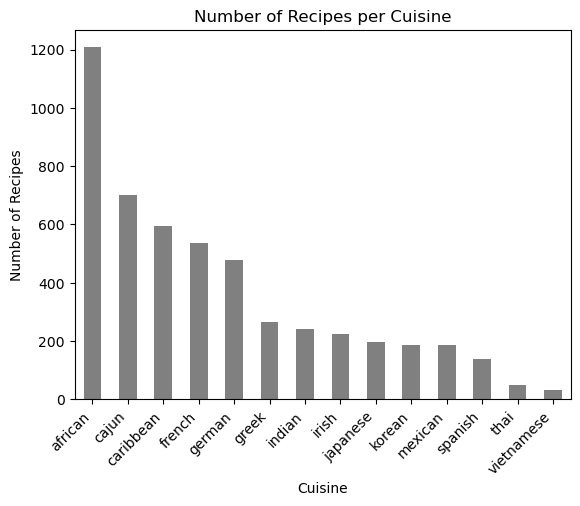

In [26]:
# Create a DataFrame grouped by the means of each cuisine
cuisine_count = clean_recipes.groupby(['cuisine'])['id'].count()

# Plot the distribution of recipes per cuisine
count_chart = cuisine_count.sort_values(ascending=False).plot(
    kind = "bar",
    title = "Number of Recipes per Cuisine",
    color = "grey")
count_chart.set_xlabel("Cuisine")
count_chart.set_ylabel("Number of Recipes")
count_chart.set_xticklabels(
    cuisine_count.index,
    rotation_mode='default',
    rotation=45,
    ha='right')

# Save the plot as a png
plt.savefig(f'Images/Question 3 - Number of Recipes per Cuisine.png')
plt.show()

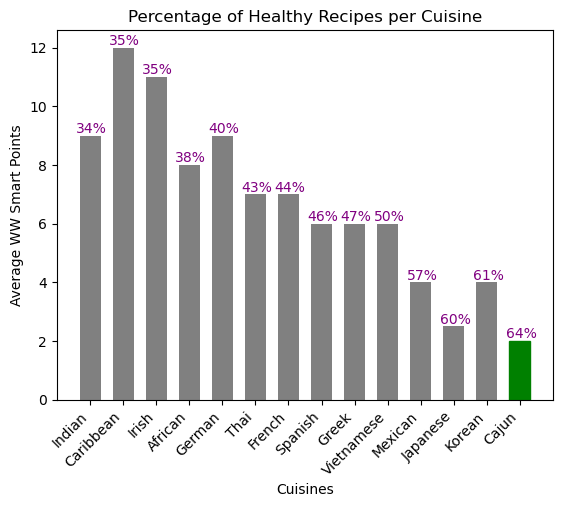

In [21]:
# Create a DataFrame grouped by the means of each cuisine
cuisine_df = clean_recipes.groupby(['cuisine']).median(numeric_only=True)

# Get percentage of "healthy" recipes per cuisine
# Set the limit as the median 'wws_points'
wws_median = clean_recipes['wws_points'].describe()['50%']

# Get the total number of recipes per cuisine
cuisine_count = clean_recipes.groupby(['cuisine'])['id'].count()

# Create a DataFrame of recipes that sit above the median 'wws_points'
healthy_count = clean_recipes.loc[clean_recipes['wws_points'] < wws_median]

# Create a groupby DataFrame that counts the number of healthy recipes
healthy_group = healthy_count.groupby(['cuisine'])['id'].count()

# Calculate the percentage value
percent_healthy = []
for idx in range(len(cuisine_count)):
    percent_healthy.append(int(healthy_group[idx] * 100 / cuisine_count[idx]))

# Create a DataFrame with calculated percentages, add the average WWS Points as a new column
percent_df = pd.DataFrame(percent_healthy, index=healthy_group.index, columns=['percent_healthy'])
percent_df['ave_wws_points'] = cuisine_df['wws_points']

# Sort the values and reset index to recover 'cuisine'
percent_df = percent_df.sort_values(by=['percent_healthy'], ascending=True).reset_index()

# Plot the bar chart
bar_chart = plt.bar(
    x = percent_df['cuisine'],
    height = percent_df['ave_wws_points'],
    width = 0.64,
    color = 'grey')
bar_chart.set_figwidth = 15
bar_chart.set_figheight = 15

# Set the labels
plt.title("Percentage of Healthy Recipes per Cuisine")
plt.xlabel("Cuisines")
plt.ylabel("Average WW Smart Points")

# Set the xticks
cuisine_titles = [word.title() for word in percent_df['cuisine']]
plt.xticks(
    ticks = percent_df['cuisine'],
    labels = cuisine_titles,
    rotation_mode = 'default',
    rotation = 45,
    ha = 'right')

# Find the healthiest meal index and set the bar colour to green
highest_pct = percent_df['percent_healthy'].max()
healthiest_meal = percent_df.loc[percent_df['percent_healthy'] == highest_pct].index[0]
bar_chart[healthiest_meal].set_color('green')

# Annotate the bar chart with the percentage values
for index, row in percent_df.iterrows():
    plt.annotate(
        f"{row['percent_healthy']}%", color="purple",
        xy=(row.name, cuisine_df[cuisine_df.index == row['cuisine']]['wws_points']),
        xytext=(-10,2), textcoords='offset points')

# Save the plot as a png
plt.savefig(f'Images/Question 3 - Percentage of Healthy Recipes per Cuisine.png')

In [28]:
# Import cuisine_dataframe.csv, which contains geographic information
cuisine_data = pd.read_csv('Output/cuisine_dataframe.csv')

# Plot each region with the rating as the colour and WW Smart points as the size
cuisine_map = cuisine_data.hvplot.points(
    'longitude',
    'latitude',
    color = 'rating',
    # cmap = ['purple', 'red'],
    size = 'wws_points',
    scale = 30,
    alpha = 0.3,
    geo = True,
    tiles = "CartoLight",
    frame_width = 1000,
    frame_height = 800)

# Save the plot as a png
plt.savefig(f'Images/Question 3 - Cuisine Map.png')

# Display the map
cuisine_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (rating,wws_points)

<Figure size 640x480 with 0 Axes>